# ABNB STOCKS

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_theme(context= "notebook", palette= "deep", style= "whitegrid")

In [3]:
sym= pdr.get_nasdaq_symbols()
sym.shape

(12188, 11)

We can locate over 12000 nasdaq symbols using get_nasdaw_symbols from pandas_datareader

In [4]:
sym.iloc[50:55, :2] 

,Nasdaq Traded,Security Name
Symbol,,
ABNB,True,"Airbnb, Inc. - Class A Common Stock"
ABOS,True,"Acumen Pharmaceuticals, Inc. - Common Stock"
ABR,True,Arbor Realty Trust Common Stock
ABR$D,True,Arbor Realty Trust 6.375% Series D Cumulative ...
ABR$E,True,Arbor Realty Trust 6.25% Series E Cumulative R...


In [5]:
sym.loc["ABNB"]

Nasdaq Traded                                      True
Security Name       Airbnb, Inc. - Class A Common Stock
Listing Exchange                                      Q
Market Category                                       Q
ETF                                               False
Round Lot Size                                    100.0
Test Issue                                        False
Financial Status                                      N
CQS Symbol                                          NaN
NASDAQ Symbol                                      ABNB
NextShares                                        False
Name: ABNB, dtype: object

In [6]:
ticker= "ABNB"
startdate= dt.datetime(2020,1,1)

df= pdr.get_data_yahoo(ticker, startdate)  #extracting data from yahoo finance using pandas datareader
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-18,117.040001,107.620003,116.110001,108.029999,9718700,108.029999
2022-05-19,116.349998,107.449997,108.180000,114.169998,8926600,114.169998
2022-05-20,116.250000,108.500000,115.459999,112.550003,6958300,112.550003
2022-05-23,115.150002,110.930000,113.544998,113.279999,5982900,113.279999
2022-05-24,111.419998,105.349998,111.279999,105.900002,1499735,105.900002


In [7]:
df.shape

(366, 6)

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [10]:
df.index

DatetimeIndex(['2020-12-10', '2020-12-11', '2020-12-14', '2020-12-15',
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23',
               ...
               '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-16',
               '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20',
               '2022-05-23', '2022-05-24'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [11]:
df1= df[["High", "Low", "Open", "Close"]].copy()
df1.head()

,High,Low,Open,Close
Date,,,,
2020-12-10,165.000000,141.250000,146.000000,144.710007
2020-12-11,151.500000,135.100006,146.550003,139.250000
2020-12-14,135.300003,125.160004,135.000000,130.000000
2020-12-15,127.599998,121.500000,126.690002,124.800003
2020-12-16,142.000000,124.910004,125.830002,137.990005


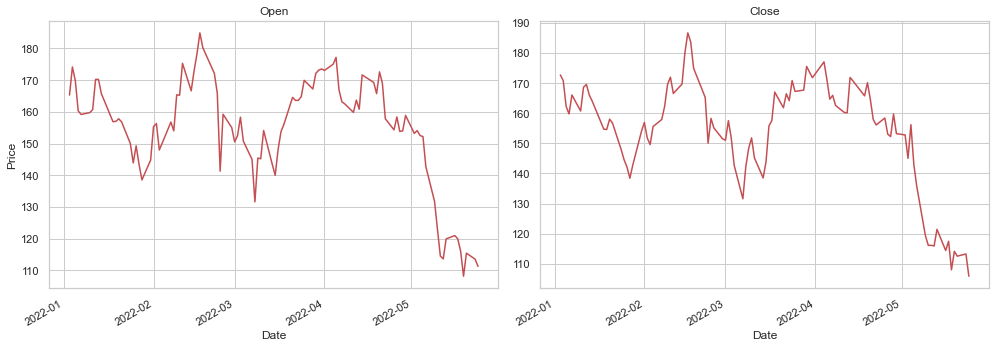

In [12]:
fig, ax= plt.subplots(nrows=1,ncols=2,figsize= (14,5) )

df1['Open'].loc['2022-01-01':].plot(ax= ax[0],title= "Open", c="r")
df1['Close'].loc['2022-01-01':].plot(ax=ax[1], title= "Close", c="r")
ax[0].set_ylabel("Price")
plt.tight_layout()



## Percentile Change

In [13]:
df1["% -chg"]= df["Close"].pct_change()
df1.tail()

,High,Low,Open,Close,% -chg
Date,,,,,
2022-05-18,117.040001,107.620003,116.110001,108.029999,-0.080596
2022-05-19,116.349998,107.449997,108.180000,114.169998,0.056836
2022-05-20,116.250000,108.500000,115.459999,112.550003,-0.014189
2022-05-23,115.150002,110.930000,113.544998,113.279999,0.006486
2022-05-24,111.419998,105.349998,111.279999,105.900002,-0.065148


## Daily Returns

In [14]:
df1['Daily_returns']= (df1["Close"].shift(-1) - df1["Close"])/ df1["Close"] #shift(-1) returns the next column
df1.head()     

,High,Low,Open,Close,% -chg,Daily_returns
Date,,,,,,
2020-12-10,165.000000,141.250000,146.000000,144.710007,NaN,-0.037731
2020-12-11,151.500000,135.100006,146.550003,139.250000,-0.037731,-0.066427
2020-12-14,135.300003,125.160004,135.000000,130.000000,-0.066427,-0.040000
2020-12-15,127.599998,121.500000,126.690002,124.800003,-0.040000,0.105689
2020-12-16,142.000000,124.910004,125.830002,137.990005,0.105689,0.065657


## Volatility

In [15]:
df1["Log_returns"]=np.log(df1["Close"] / df1["Close"].shift())
df1["Log_returns"].std() #this is the daily standard deviation

0.036462355407004245

In [16]:
volatility = df1["Log_returns"].std() * 252 **.5   #252 because we have 252 trading days per year
vol = round(volatility * 100, 2)
str_vol= str(vol)
str_vol

'57.88'

Text(0.5, 1.0, 'ABNB volatility: 57.88%')

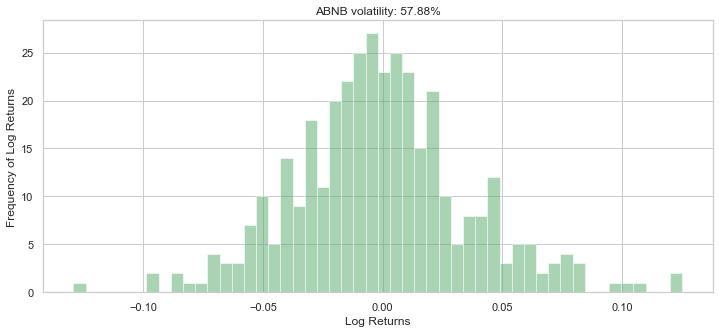

In [17]:
#visualizing log returns

fig, ax= plt.subplots(figsize= (12,5))
df1["Log_returns"].hist(ax=ax, bins=50, color='g', alpha= 0.5)
ax.set_xlabel("Log Returns")
ax.set_ylabel("Frequency of Log Returns")
ax.set_title("ABNB volatility: " + str_vol + "%")

## Simple Moving Average

In [18]:
df1["SMA40"]= df1.Close.rolling(10).mean()
df1["SMA200"]= df1.Close.rolling(50).mean()

df1.tail()

,High,Low,Open,Close,% -chg,Daily_returns,Log_returns,SMA40,SMA200
Date,,,,,,,,,
2022-05-18,117.040001,107.620003,116.110001,108.029999,-0.080596,0.056836,-0.084029,120.793999,153.145401
2022-05-19,116.349998,107.449997,108.180000,114.169998,0.056836,-0.014189,0.055280,117.902000,152.462601
2022-05-20,116.250000,108.500000,115.459999,112.550003,-0.014189,0.006486,-0.014291,115.573000,151.677601
2022-05-23,115.150002,110.930000,113.544998,113.279999,0.006486,-0.065148,0.006465,114.964000,151.040401
2022-05-24,111.419998,105.349998,111.279999,105.900002,-0.065148,NaN,-0.067367,113.941000,150.388401


Text(0.5, 1.0, 'Close Price v. SMA40 v. SMA200')

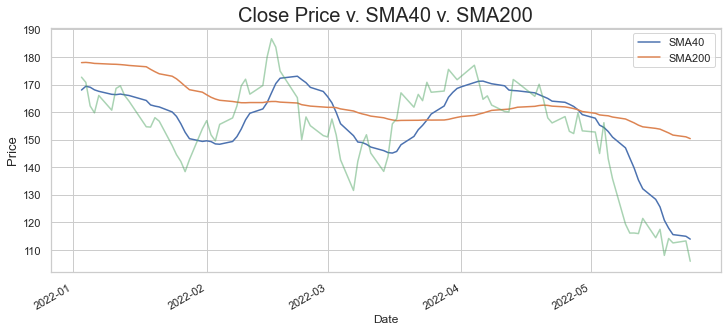

In [19]:
#lets visualize the moving averages

fig, ax= plt.subplots(figsize= (12,5))

df1[["SMA40", "SMA200"]].loc["2022-01-01":].plot(ax=ax)
df1["Close"].loc["2022-01-01":].plot(ax=ax, alpha=0.5)
ax.set_ylabel("Price", fontsize= 13)
ax.set_title("Close Price v. SMA40 v. SMA200", fontsize= 20)

SMA40 is more closely associated with Close Price compared to SMA200. Hence, we call SMA40 a fast signal and SMA200 a slow signal which reflects the price over a long history.

Trend following traders believe the stock price will move upwards for a while if SMA40 > SMA200.

## Exponential Moving Average

In [20]:
df1["EMA40"] = df1["Close"].ewm(span = 40, adjust = False).mean()

Text(0.5, 1.0, 'Close Price v. SMA40 v. EMA40')

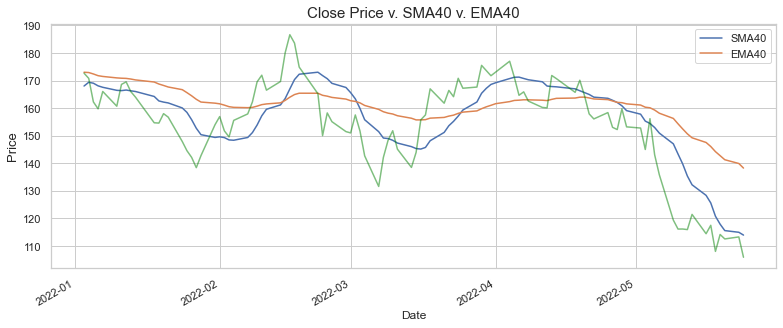

In [21]:
#lets visualize SMA40 and EMA40

fig, ax= plt.subplots(figsize=(13,5))

df1[["SMA40", "EMA40"]].loc["2022-01-01":].plot(ax=ax)
df1["Close"].loc["2022-01-01":].plot(ax=ax, alpha= 0.5,color= 'green')
ax.set_ylabel("Price", fontsize= 13)
ax.set_title("Close Price v. SMA40 v. EMA40",fontsize= 15)

## MACD

MACD = 12 Period EMA - 26 Period EMA

In [22]:
ema12= df1["Close"].ewm(span= 12, adjust= False).mean()
ema26= df1["Close"].ewm(span=26, adjust=False).mean()

df1["MACD"]= ema12- ema26

## Signal Line

Signal line is the 9 Period EMA of MACD

In [23]:
df1["Signal line"]= df1["MACD"].ewm(span=9, adjust=False).mean()

In [24]:
df1.tail()

,High,Low,Open,Close,% -chg,Daily_returns,Log_returns,SMA40,SMA200,EMA40,MACD,Signal line
Date,,,,,,,,,,,,
2022-05-18,117.040001,107.620003,116.110001,108.029999,-0.080596,0.056836,-0.084029,120.793999,153.145401,144.223421,-12.951366,-10.193460
2022-05-19,116.349998,107.449997,108.180000,114.169998,0.056836,-0.014189,0.055280,117.902000,152.462601,142.757400,-12.835910,-10.721950
2022-05-20,116.250000,108.500000,115.459999,112.550003,-0.014189,0.006486,-0.014291,115.573000,151.677601,141.283868,-12.728406,-11.123241
2022-05-23,115.150002,110.930000,113.544998,113.279999,0.006486,-0.065148,0.006465,114.964000,151.040401,139.917826,-12.440892,-11.386772
2022-05-24,111.419998,105.349998,111.279999,105.900002,-0.065148,NaN,-0.067367,113.941000,150.388401,138.258420,-12.662574,-11.641932


Text(0.5, 1.0, 'MACD v. Signal Line')

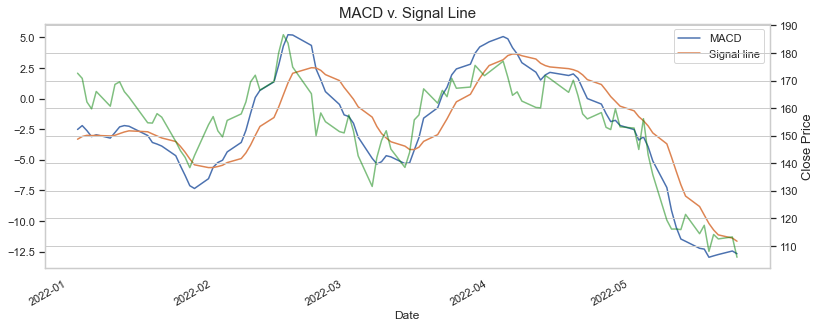

In [25]:
#we plot close price, macd and signal line

fig,ax= plt.subplots(figsize= (13,5))


df1[["MACD", "Signal line"]].loc["2022-01-01":].plot(ax=ax)
df1["Close"].loc["2022-01-01":].plot(ax=ax, alpha= 0.5, color= 'green', secondary_y=True)

ax.right_ax.set_ylabel("Close Price", fontsize= 13)
ax.set_title("MACD v. Signal Line", fontsize=15)

## Stochastic Oscillator

In [26]:
high14= df1["High"].rolling(14).max() #max of the last 14 trading days
low14= df1["Low"].rolling(14).min() #min of the last 14 trading days

df1["%k"] = (df1["Close"] - low14) * 100 / (high14 - low14)
df1["%D"] = df1["%k"].rolling(3).mean()

In [27]:
df1.tail()

,High,Low,Open,Close,% -chg,Daily_returns,Log_returns,SMA40,SMA200,EMA40,MACD,Signal line,%k,%D
Date,,,,,,,,,,,,,,
2022-05-18,117.040001,107.620003,116.110001,108.029999,-0.080596,0.056836,-0.084029,120.793999,153.145401,144.223421,-12.951366,-10.193460,0.737138,6.333114
2022-05-19,116.349998,107.449997,108.180000,114.169998,0.056836,-0.014189,0.055280,117.902000,152.462601,142.757400,-12.835910,-10.721950,13.101969,8.637128
2022-05-20,116.250000,108.500000,115.459999,112.550003,-0.014189,0.006486,-0.014291,115.573000,151.677601,141.283868,-12.728406,-11.123241,9.943469,7.927525
2022-05-23,115.150002,110.930000,113.544998,113.279999,0.006486,-0.065148,0.006465,114.964000,151.040401,139.917826,-12.440892,-11.386772,11.366740,11.470726
2022-05-24,111.419998,105.349998,111.279999,105.900002,-0.065148,NaN,-0.067367,113.941000,150.388401,138.258420,-12.662574,-11.641932,1.133326,7.481178


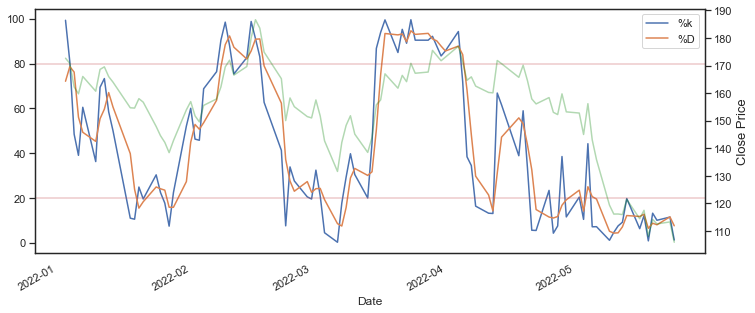

In [28]:
#lets visaulize it

sns.set_style("white")
fig, ax= plt.subplots(figsize=(12,5))

df1[["%k", "%D"]].loc["2022-01-01":].plot(ax=ax)
df1.Close.loc["2022-01-01":].plot(ax=ax, color="green", secondary_y= True, alpha=0.3)
ax.right_ax.set_ylabel("Close Price", fontsize=13)

ax.axhline(80, c="r", alpha=0.3)
ax.axhline(20, c="r", alpha=0.3)

We will now export three charts to Excel using Pandas Excelwriter
1. Close Price v. Simple Moving Average(40) v. Simple Moving Average(200)
2. Close Price v. MACD v. Signal line
3. Close Price v. %k v. %D

We will do this next

In [29]:
#saving df so it can be used for the next project

df1.to_csv("ABNBstocks.csv", na_rep= np.nan)